<a href="https://colab.research.google.com/github/Sheraz55/Deep-learning-assignments/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import tensorflow as tf

In [4]:
cars_data = pd.read_csv("/content/CarPrice_Assignment (1).csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
from sklearn.utils import shuffle
data=shuffle(data)
data=data.drop('CarName',axis=1)
data=data.drop('car_ID',axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 89 to 30
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [10]:
data.isnull().values.any()

False

In [11]:
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
89,1,gas,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,1889,ohc,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37,5499.0
121,1,gas,std,four,sedan,fwd,front,93.7,167.3,63.8,50.8,1989,ohc,four,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6692.0
92,1,gas,std,four,sedan,fwd,front,94.5,165.3,63.8,54.5,1938,ohc,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37,6849.0
37,0,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,53.3,2236,ohc,four,110,1bbl,3.15,3.58,9.0,86,5800,27,33,7895.0
12,0,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2710,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970.0


In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['fueltype']=labelencoder.fit_transform(data['fueltype'])
data['aspiration']=labelencoder.fit_transform(data['aspiration'])
data['doornumber'] = data['doornumber'].map({'two':2,'four':4})
data['carbody']=labelencoder.fit_transform(data['carbody'])
data['drivewheel']=labelencoder.fit_transform(data['drivewheel'])
data['enginelocation']=labelencoder.fit_transform(data['enginelocation'])
data['enginetype']=labelencoder.fit_transform(data['enginetype'])
data['fuelsystem']=labelencoder.fit_transform(data['fuelsystem'])
data['cylindernumber'] = labelencoder.fit_transform(data['cylindernumber'])


In [14]:
train_data=data.iloc[:103]
train_targets=data.price.iloc[:103]
train_targets=np.asarray(train_targets)
train_data.drop('price',axis=1,inplace=True)

print(train_data.shape)

test_data=data.iloc[103:166]
test_targets=data.price.iloc[103:166]
test_targets=np.asarray(test_targets)
test_data.drop('price',axis=1,inplace=True)

print(test_data.shape)

(103, 23)
(63, 23)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
val_data=data.iloc[166:]
val_data.drop('price',axis=1,inplace=True)

val_targets=data.price.iloc[166:]
val_targets=np.asarray(val_targets)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
val_data.fillna(0, inplace = True)
val_data.isna().sum()


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
dtype: int64

In [24]:
train_data.fillna(0, inplace = True)
train_data.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
dtype: int64

In [23]:
test_data.fillna(0, inplace=True)
test_data.isna().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
dtype: int64

In [32]:
from keras import models
from keras import layers
from tensorflow.keras import regularizers
model = models.Sequential()
model.add(layers.Dense(10, kernel_regularizer=regularizers.l2(0.01),activation='relu',input_shape=(train_data.iloc[1].shape)))
model.add(layers.Dropout(0.5))

#model.add(layers.Dropout(0.5))

model.add(layers.Dense(5,kernel_regularizer=regularizers.l2(0.01),activation='relu'))

model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
his=model.fit(train_data,train_targets,epochs=150,batch_size=1,validation_data=(val_data,val_targets))

Epoch 1/150
103/103 [==============================] - 1s 3ms/step - loss: 247146874.6923 - mae: 13000.0123 - val_loss: 191473056.0000 - val_mae: 11652.8428
Epoch 2/150
103/103 [==============================] - 0s 2ms/step - loss: 130510657.3462 - mae: 9186.9921 - val_loss: 141240720.0000 - val_mae: 9319.0547
Epoch 3/150
103/103 [==============================] - 0s 2ms/step - loss: 195188632.7308 - mae: 9761.7542 - val_loss: 103079552.0000 - val_mae: 7230.9009
Epoch 4/150
103/103 [==============================] - 0s 2ms/step - loss: 128883205.4014 - mae: 7406.0405 - val_loss: 82952728.0000 - val_mae: 6074.8760
Epoch 5/150
103/103 [==============================] - 0s 2ms/step - loss: 85048118.9976 - mae: 6820.7797 - val_loss: 69849224.0000 - val_mae: 5600.3975
Epoch 6/150
103/103 [==============================] - 0s 2ms/step - loss: 126384322.0000 - mae: 7629.8932 - val_loss: 65314112.0000 - val_mae: 5457.6245
Epoch 7/150
103/103 [==============================] - 0s 2ms/step - los

In [33]:
model.evaluate(test_data,test_targets)

2/2 [==============================] - 0s 7ms/step - loss: 41437036.0000 - mae: 4014.1606


[41437036.0, 4014.16064453125]

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                240       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


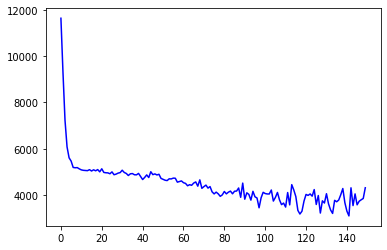

In [36]:
his.history.keys()
valmae=his.history['val_mae']
epochs=range(150)
plt.plot(epochs,valmae,'b',label='val mae')